# Guided Project: Predicting Car Prices

## 1. Introduction

This is a guided project from Dataquest's "Machine Learning Fundamentals" course, which I completed as part of the "Data Scientist in Python" path in 2021.

This project uses a car's attributes to predict its market price, and the aim is to get practise with the machine learning workflow. Information on the dataset can be found at this [site](https://archive.ics.uci.edu/ml/datasets/automobile), and it can be downloaded from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data). 

In [28]:
import pandas as pd
import numpy as np

In [29]:
# The data file does not contain the column headings, so we must provide the
# column names when reading in the data.
columns = [
    "symboling",
    "normalized-losses",
    "make",
    "fuel-type",
    "aspiration",
    "num-of-doors",
    "body-style",
    "drive-wheels",
    "engine-location",
    "wheel-base",
    "length",
    "width",
    "height",
    "curb-weight",
    "engine-type",
    "num-of-cylinders",
    "engine-size",
    "fuel-system",
    "bore",
    "stroke",
    "compression-ratio",
    "horsepower",
    "peak-rpm",
    "city-mpg",
    "highway-mpg",
    "price",
]


cars = pd.read_csv('imports-85.data', names=columns)

In [30]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [31]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## 2. Data Cleaning

In [32]:
# We can't have any missing values if we want to do predictive modelling, so let's
# replace the missing values in the 'normalised-losses' column, denoted by '?'.
cars = cars.replace('?', np.nan)
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [33]:
# Based on attribute information, let's pick out columns with 'continuous' numeric values.
numeric_columns = [
            "normalized-losses",
            "wheel-base",
            "length",
            "width",
            "height",
            "curb-weight",
            "engine-size",
            "bore",
            "stroke",
            "compression-ratio",
            "horsepower",
            "peak-rpm",
            "city-mpg",
            "highway-mpg",
            "price",
]

cars_numeric = cars[numeric_columns]
cars_numeric = cars_numeric.astype('float')
cars_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   normalized-losses  164 non-null    float64
 1   wheel-base         205 non-null    float64
 2   length             205 non-null    float64
 3   width              205 non-null    float64
 4   height             205 non-null    float64
 5   curb-weight        205 non-null    float64
 6   engine-size        205 non-null    float64
 7   bore               201 non-null    float64
 8   stroke             201 non-null    float64
 9   compression-ratio  205 non-null    float64
 10  horsepower         203 non-null    float64
 11  peak-rpm           203 non-null    float64
 12  city-mpg           205 non-null    float64
 13  highway-mpg        205 non-null    float64
 14  price              201 non-null    float64
dtypes: float64(15)
memory usage: 24.1 KB


In [34]:
cars_numeric.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [35]:
# The column 'price' is what we're trying to predict, so let's remove rows
# where 'price' doesn't have a value.
cars_numeric = cars_numeric.dropna(subset=['price'])
cars_numeric.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [36]:
# For the remaining columns, replace missing values with the column averages.
cars_numeric = cars_numeric.fillna(cars_numeric.mean())

In [37]:
# There should be no more missing values.
cars_numeric.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [38]:
# Normalise the dataframe so that all values range from 0 to 1 except for the target
# 'price' column.
price_column = cars_numeric['price']
cars_numeric = (cars_numeric - cars_numeric.min()) / (cars_numeric.max() - cars_numeric.min())
cars_numeric['price'] = price_column
cars_numeric.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## 3. Univariate Model

We'll start with some simple univariate k-nearest neighbours models to help us structure
our code workflow and understand the features better.

In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(training_col, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomise the rows in the dataframe
    shuffled_rows = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_rows)
    
    # Split the dataframe by a proportion of 50/50 into a training set and a test set
    middle_row = int(df.shape[0] * .50)
    train_df = shuffled_df.iloc[:middle_row]
    test_df = shuffled_df.iloc[middle_row:]
    
    # Fit the KNN model on the training set using the default k value
    knn.fit(train_df[[training_col]], train_df[target_col])
    
    # Make predictions on the test set
    predictions = knn.predict(test_df[[training_col]])
    
    # Calculate the RMSE and return that value
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [40]:
# Train and test univariate models using the different numeric columns in the data set,
# using the default k value

rmse_values = {}

training_columns = cars_numeric.columns.drop('price')

for col in training_columns:
    rmse = knn_train_test(col, 'price', cars_numeric)
    rmse_values[col] = rmse
    
# Convert the dictionary of rmse values to a Series for easy processing and viewing
rmse_series = pd.Series(rmse_values)
rmse_series.sort_values()

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-ratio    6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

In [41]:
# Modify the function to accept a parameter for the k value.
# This modification is reflected in the first line of the function.
def knn_train_test(k, training_col, target_col, df):
    knn = KNeighborsRegressor(n_neighbors=k)
    np.random.seed(1)
    
    # Randomise the rows in the dataframe
    shuffled_rows = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_rows)
    
    # Split the dataframe by a proportion of 50/50 into a training set and a test set
    middle_row = int(df.shape[0] * .50)
    train_df = shuffled_df.iloc[:middle_row]
    test_df = shuffled_df.iloc[middle_row:]
    
    # Fit the KNN model on the training set using the default k value
    knn.fit(train_df[[training_col]], train_df[target_col])
    
    # Make predictions on the test set
    predictions = knn.predict(test_df[[training_col]])
    
    # Calculate the RMSE and return that value
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [42]:
# For each numeric column, create, train, and test a univariate model
# using odd k values from 1 to 9.
k_values = [1, 3, 5, 7, 9]

rmse_values = {}

training_columns = cars_numeric.columns.drop('price')

for col in training_columns:
    rmse_k_values = {}
    
    for k in k_values:
        rmse = knn_train_test(k, col, 'price', cars_numeric)
        rmse_k_values[k] = rmse
        
    rmse_values[col] = rmse_k_values
    
rmse_values

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,


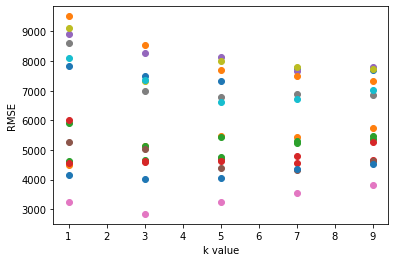

In [43]:
# Visualise the results using a scatter plot
import matplotlib.pyplot as plt
%matplotlib inline

for k, v in rmse_values.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.scatter(x, y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

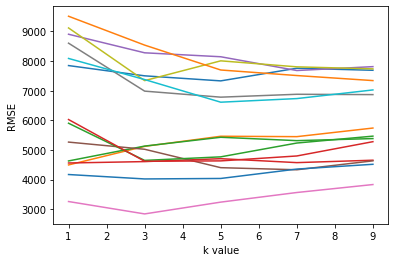

In [44]:
# Visualise the results using a line plot

for k, v in rmse_values.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x, y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

## 4. Multivariate Model

The knn_train_test() function written in the previous section will be modified to work with multiple columns.

In [45]:
# Use all columns passed in to train and test.
# Use the default k value from scikit-learn.

def knn_train_test(training_cols, target_col, df):
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # Randomise the rows in the dataframe
    shuffled_rows = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_rows)
    
    # Split the dataframe by a proportion of 50/50 into a training set and a test set
    middle_row = int(df.shape[0] * .50)
    train_df = shuffled_df.iloc[:middle_row]
    test_df = shuffled_df.iloc[middle_row:]
    
    # Fit the KNN model on the training set using the default k value
    knn.fit(train_df[training_cols], train_df[target_col])
    
    # Make predictions on the test set
    predictions = knn.predict(test_df[training_cols])
    
    # Calculate the RMSE and return that value
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

In [46]:
# Calculate the average RMSE for each feature across all k values
feature_avg_rmse = {}

for k, v in rmse_values.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
    
# Convert the feature average rmse dictionary into a Series
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_avg_rmse = series_avg_rmse.sort_values()
sorted_avg_rmse

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-ratio    7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64

In [47]:
sorted_features = sorted_avg_rmse.index
sorted_features

Index(['engine-size', 'horsepower', 'width', 'curb-weight', 'highway-mpg',
       'length', 'city-mpg', 'wheel-base', 'compression-ratio', 'bore',
       'normalized-losses', 'stroke', 'peak-rpm', 'height'],
      dtype='object')

In [48]:
# Use the best n (2 to 5) features from the previous step to train and test a
# multivariate k-nearest neighbours model using the default k value.

for n in range(2,6):
    rmse_values = knn_train_test(sorted_features[:n], 'price', cars_numeric)
    print(f"The RMSE when using the {n} best features for the default k value is: {rmse_values}.")

The RMSE when using the 2 best features for the default k value is: 2949.8817277180374.
The RMSE when using the 3 best features for the default k value is: 3580.7376651928435.
The RMSE when using the 4 best features for the default k value is: 3487.340917327035.
The RMSE when using the 5 best features for the default k value is: 3410.2170133901805.


In [49]:
# Modify the function to use all columns passed in to train and test, and to
# also accept a value for k.

def knn_train_test(k, training_cols, target_col, df):
    knn = KNeighborsRegressor(n_neighbors = k)
    np.random.seed(1)
    
    # Randomise the rows in the dataframe
    shuffled_rows = np.random.permutation(df.index)
    shuffled_df = df.reindex(shuffled_rows)
    
    # Split the dataframe by a proportion of 50/50 into a training set and a test set
    middle_row = int(df.shape[0] * .50)
    train_df = shuffled_df.iloc[:middle_row]
    test_df = shuffled_df.iloc[middle_row:]
    
    # Fit the KNN model on the training set using the default k value
    knn.fit(train_df[training_cols], train_df[target_col])
    
    # Make predictions on the test set
    predictions = knn.predict(test_df[training_cols])
    
    # Calculate the RMSE and return that value
    mse = mean_squared_error(test_df[target_col], predictions)
    rmse = np.sqrt(mse)
    return rmse

# Train and test for k values between 1 and 25, using the best 2 to 5 features
k_values = [k for k in range(1, 26)]

k_rmses = {}

for n in range(2,6):
    k_features_rmses = {}
    for k in k_values:
        k_features_rmses[k] = knn_train_test(k, sorted_features[:n], 'price', cars_numeric)
    k_rmses[f"{n} best features"] = k_features_rmses

k_rmses

{'2 best features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579,
  25: 4955.892429427362},
 '3 best features': {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163,
  11: 4121.687230061635,
  12: 4255.700651624227,
  13: 4328.476829895253,
  14: 4332.21649

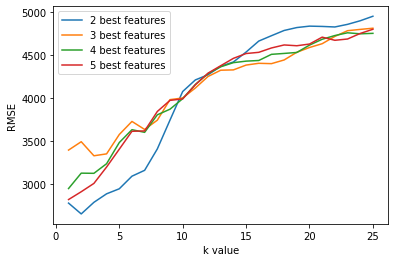

In [50]:
# Display all of the RMSE values above
for k, v in k_rmses.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x, y, label="{}".format(k))

plt.xlabel("k value")
plt.ylabel("RMSE")
plt.legend()

## 6. Use k-fold ross validation (for extra credit!)

In [81]:
# Modify the knn_train_test() function to use k-fold cross validation
# instead of test/train validation.

def knn_train_test(splits, k, training_cols, target_col, df):
    # Instantiate an instance of the KFold class
    from sklearn.model_selection import KFold, cross_val_score
    kf = KFold(splits, shuffle=True, random_state=1)
    
    knn = KNeighborsRegressor(n_neighbors=k)
    np.random.seed(1)
    
    mses = cross_val_score (
        knn,
        df[training_cols],
        df[target_col],
        scoring="neg_mean_squared_error",
        cv=kf
    )
    
    rmses = np.sqrt(np.absolute(mses)) 
    avg_rmse = np.mean(rmses)
    
    return avg_rmse

# Train and test for k values between 1 and 25, using the best 2 to 5 features
k_values = [k for k in range(1, 26)]

splits = 10

for n in range(2,6):
    #print(sorted_features[:n])
    rmse_values = knn_train_test(splits, k, sorted_features[:n], 'price', cars_numeric)
    print(f"The RMSE when using the {n} best features for the default k value is: {rmse_values}.")
    
k_rmses = {}

for n in range(2,6):
    k_features_rmses = {}
    for k in k_values:
        k_features_rmses[k] = knn_train_test(splits, k, sorted_features[:n], 'price', cars_numeric)
    k_rmses[f"{n} best features"] = k_features_rmses

k_rmses

The RMSE when using the 2 best features for the default k value is: 4396.694250351881.
The RMSE when using the 3 best features for the default k value is: 4222.954495202252.
The RMSE when using the 4 best features for the default k value is: 4115.471782039201.
The RMSE when using the 5 best features for the default k value is: 4123.111016544302.


{'2 best features': {1: 2844.6738023575053,
  2: 2601.2320598273477,
  3: 2636.5883949955796,
  4: 2787.516162198912,
  5: 2808.4983984193304,
  6: 2845.3008673634185,
  7: 2934.275309828578,
  8: 3137.167365122338,
  9: 3205.8876254263178,
  10: 3285.3850135510047,
  11: 3422.1375743796843,
  12: 3550.5516722965376,
  13: 3691.4335807073912,
  14: 3793.5952330652267,
  15: 3868.994116314313,
  16: 3897.4576330716213,
  17: 3933.2465918697517,
  18: 4025.3490798025623,
  19: 4085.6682300076645,
  20: 4140.402487825685,
  21: 4166.786411146952,
  22: 4205.597041611041,
  23: 4278.854191048603,
  24: 4336.7415031100345,
  25: 4396.694250351881},
 '3 best features': {1: 2726.9297759497135,
  2: 2703.564030002367,
  3: 2781.5659507487435,
  4: 2919.9368436139735,
  5: 3031.767371260333,
  6: 3163.352228814234,
  7: 3301.7360046271315,
  8: 3334.8298982284878,
  9: 3363.2517083798375,
  10: 3386.824559906182,
  11: 3411.1854293862043,
  12: 3427.6208376397676,
  13: 3509.0328877950074,
  14

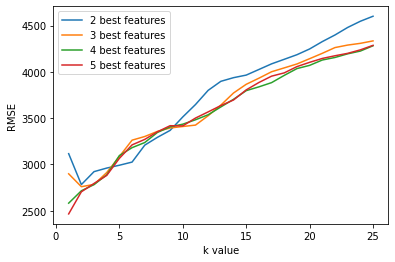

In [79]:
# Display all of the RMSE values above
for k, v in k_rmses.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x, y, label="{}".format(k))

plt.xlabel("k value")
plt.ylabel("RMSE")
plt.legend()